# Multiple Linear Regression Assignment

### 21109073 Astik Sonawane

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

c:\Users\HOME\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv(r"C:\Users\HOME\Desktop\DSA\Assignment 2\Toyota.csv")
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
#checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1436 non-null   int64  
 1   Model             1436 non-null   object 
 2   Price             1436 non-null   int64  
 3   Age_08_04         1436 non-null   int64  
 4   Mfg_Month         1436 non-null   int64  
 5   Mfg_Year          1436 non-null   int64  
 6   KM                1436 non-null   int64  
 7   Fuel_Type         1436 non-null   object 
 8   HP                1434 non-null   float64
 9   Met_Color         1436 non-null   int64  
 10  Color             1436 non-null   object 
 11  Automatic         1436 non-null   int64  
 12  cc                1436 non-null   int64  
 13  Doors             1436 non-null   int64  
 14  Cylinders         1436 non-null   int64  
 15  Gears             1436 non-null   int64  
 16  Quarterly_Tax     1436 non-null   int64  


In [4]:
data.drop(columns=['Cylinders','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Quarterly_Tax','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'], inplace=True)

In [5]:
data.head()

,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90.0,2000,3,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90.0,2000,3,5,1165
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90.0,2000,3,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90.0,2000,3,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90.0,2000,3,5,1170


In [6]:
data.isnull().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           2
cc           0
Doors        0
Gears        0
Weight       0
dtype: int64

In [7]:
# Calculate the average of non-null values in the 'HP' column
average_hp = data['HP'].mean()

# Replace null values in the 'HP' column with the average
data['HP'].fillna(average_hp, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1436 non-null   int64  
 1   Model      1436 non-null   object 
 2   Price      1436 non-null   int64  
 3   Age_08_04  1436 non-null   int64  
 4   KM         1436 non-null   int64  
 5   HP         1436 non-null   float64
 6   cc         1436 non-null   int64  
 7   Doors      1436 non-null   int64  
 8   Gears      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 112.3+ KB


C:\Users\HOME\AppData\Local\Temp\ipykernel_25760\710003151.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['HP'].fillna(average_hp, inplace=True)


In [8]:
X = data[['Age_08_04', 'KM', 'HP','cc','Doors', 'Gears', 'Weight']]
y = data['Price']

In [9]:
# Splitting data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# model building

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Making Predictions
y_pred = model.predict(X_test)
y_pred

array([11317.29846269,  8918.78448174,  9508.39211097,  8955.14888673,
       10121.39398108,  7808.73026425,  8751.48049021,  8331.5710554 ,
       14101.48850062, 13179.89223506,  9363.66103953,  9358.44792209,
       12983.08190044, 13084.74314686,  9723.53402998,  8260.78213152,
       12289.14865243, 17457.6433218 ,  7248.99190041,  9199.79143909,
       12781.98460541, 17805.25653403,  7891.731488  , 10501.38181749,
        7384.6863781 , 15982.73181616,  9587.63680684,  7209.61640308,
       15528.95640743, 14575.07570822,  8121.67265842,  9897.36562072,
        8527.39842461, 10105.47486   , 10290.01689199,  8009.79681932,
        8879.03383954,  9970.58683286, 16223.91417702,  9450.5482417 ,
        9895.41549571,  9549.12748319,  7874.0059817 ,  5304.66145181,
        6776.53298118, 17025.58771169,  9439.1487023 , 10676.62851279,
        8753.10136092, 13561.46150248, 13071.11791915,  6336.78660072,
       14720.80364294, 16192.68367949,  5895.88938661,  7710.08351801,
      

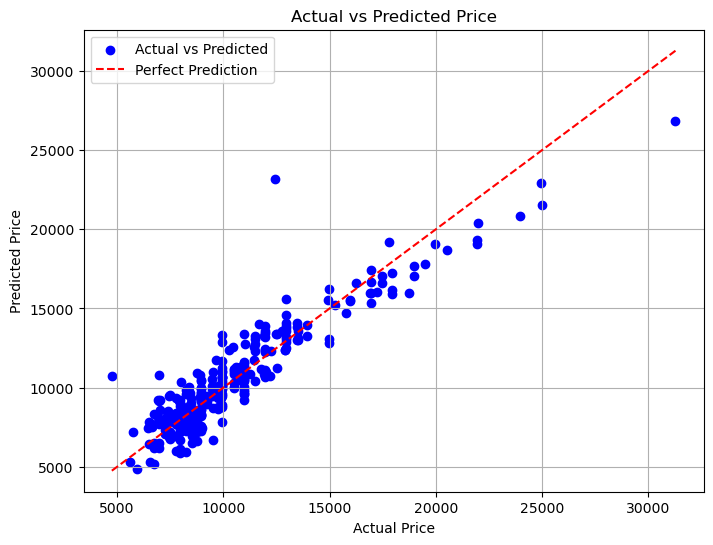

In [12]:
# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Model Evaluation

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 996.0847838224187
Mean Squared Error: 1978084.8261539815
R-squared: 0.8517487723649542


In [15]:

# Create a DataFrame with the features of the new data
new_data = pd.DataFrame({'Age_08_04': 22,'KM': 43610,'HP': 192,'cc': 2000,  'Doors': 3,'Gears': 6,'Weight': 1185}, index=[1])

# Predict the price using the trained model
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price)

# without removing outliers

Predicted Price: [20584.99836958]


### Removing Outliers

In [16]:
# Training initial linear regression model
initial_model = OLS(y_train, sm.add_constant(X_train)).fit()

In [17]:
# Calculate Cook's distance
influence = initial_model.get_influence()
cooks_distance = influence.cooks_distance[0]

# Set the threshold for Cook's distance
threshold = 1

# Identify outliers
outliers_indices = [i for i, d in enumerate(cooks_distance) if d > threshold]

In [18]:
X_train_clean = X_train.drop(outliers_indices, errors='ignore')
y_train_clean = y_train.drop(outliers_indices, errors='ignore')

# Retraining
clean_model = LinearRegression()
clean_model.fit(X_train_clean, y_train_clean)

LinearRegression()

In [19]:
new_data = {
    'Age_08_04': 22,
    'KM': 43610,
    'HP': 192,
    'cc': 2000,  
    'Doors': 3,
    'Gears': 6,
    'Weight': 1185
}
# Converting the new data to a DataFrame
new_data_df = pd.DataFrame([new_data])

# Predicting price
predicted_price = clean_model.predict(new_data_df)

print("Predicted Price:", predicted_price[0])


Predicted Price: 20584.998369577228
